In [30]:
import numpy as np
from xgboost import XGBClassifier  
import pandas as pd
from sklearn.model_selection import train_test_split  
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from keras.utils import np_utils
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier  

In [31]:
df = pd.read_csv("data/data_moods.csv")

In [32]:
col_features = df.columns[7:-3]
X2 = np.array(df[col_features])
Y = df['mood']

In [33]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_y = encoder.transform(Y)

# dummy_y = np_utils.to_categorical(encoded_y)

x_train,x_test,y_train,y_test = train_test_split(X2,encoded_y,test_size=0.3,random_state=20)

target = pd.DataFrame({'mood':df['mood'].tolist(),'encode':encoded_y}).drop_duplicates().sort_values(['encode'],ascending=True)
target

,mood,encode
5,Calm,0
4,Energetic,1
0,Happy,2
1,Sad,3


In [34]:
xtraining,xvalid,ytraining,yvalid = train_test_split(X2,encoded_y,test_size=0.2,random_state=20)

In [35]:
model1 = RandomForestClassifier()
model2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
model3 = XGBClassifier()

In [36]:
model1.fit(xtraining,ytraining)
model2.fit(xtraining,ytraining)
model3.fit(xtraining,ytraining)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [37]:
#making predictions for the validation data
preds1 = model1.predict(xvalid)
preds2 = model2.predict(xvalid)
preds3 = model3.predict(xvalid)

#making predictions for the test data
test_preds1 = model1.predict(x_test)
test_preds2 = model2.predict(x_test)
test_preds3 = model3.predict(x_test)

In [38]:
train_stack = np.column_stack((preds1,preds2,preds3))

In [39]:
test_stack = np.column_stack((test_preds1,test_preds2,test_preds3))

In [40]:
final_model = XGBClassifier()

In [41]:
final_model.fit(train_stack,yvalid)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [42]:
final_predictions = final_model.predict(test_stack)

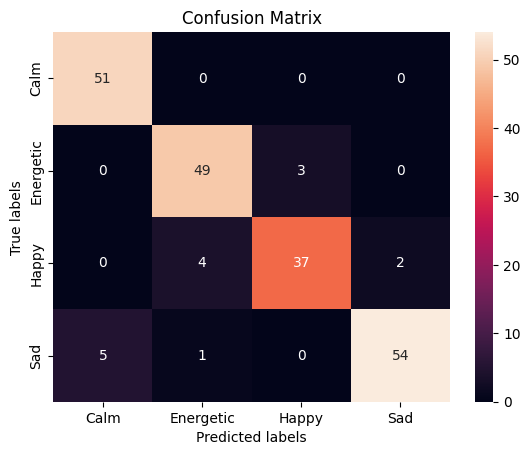

Accuracy: 92.72%


In [43]:
cm = confusion_matrix(y_test,final_predictions)
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)

labels = target['mood']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

accuracy1 = accuracy_score(y_test,final_predictions)  
print("Accuracy: %.2f%%" % (accuracy1 * 100.0))  

In [44]:
import joblib
joblib.dump(model1,"model1.pkl")
joblib.dump(model2,"model2.pkl")
joblib.dump(model3,"model3.pkl")
joblib.dump(final_model,"final_model.pkl")


['final_model.pkl']